# Exercicio (AC1) - Seleção de Variáveis

- Gabriel D. Padua RA 200749
- Rafael Prestes RA 200779 
- Thomas Elinton RA 130531
- Gabriela Fontolan RA 200645
- Náthali Yukari RA 200145 

### Exportando a base de dados

In [9]:
hbat <- read.csv(file = '../../../data/HBAT.csv')
head(hbat)

,X,id,x1,x2,x3,x4,x5,x6,x7,x8,⋯,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,1 to 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,8.5,3.9,2.5,⋯,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
2,2,2,Over 5 years,Newsprint industry,Small (0 to 499),USA/North America,Indirect through broker,8.2,2.7,5.1,⋯,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
3,3,3,Over 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,9.2,3.4,5.6,⋯,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
4,4,4,Less than 1 year,Newsprint industry,Large (500+),Outside North America,Indirect through broker,6.4,3.3,7.0,⋯,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
5,5,5,1 to 5 years,Magazine industry,Large (500+),USA/North America,Direct to customer,9.0,3.4,5.2,⋯,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"
6,6,6,Less than 1 year,Newsprint industry,Small (0 to 499),Outside North America,Indirect through broker,6.5,2.8,3.1,⋯,5.1,9.5,3.6,4.7,3.3,4.7,6.3,6.1,50.1,"No, would not consider"


### Gerando modelo utilizando Boostrap com amostragem de repetição de valores

In [11]:
max = 10000
set.seed(123)

mse <- vector(length = max)
for(i in 1:max){
    indexTrain <- sample(1:nrow(hbat), 200, TRUE)
    indexTest  <- sample(1:nrow(hbat), 50, TRUE)

    train <- hbat[indexTrain, ]
    test <- hbat[indexTest, ]
    
    
    modelo <- lm(x19 ~ x7 + x9 + x11 + x12, train)
    y_predict <- predict(modelo, test[, c('x7', 'x9', 'x11', 'x12')])
    y_real <- hbat$x19[indexTest]
    
    mse[i] <- mean((y_real - y_predict)^2)
}

### Calculando a media do MSE

In [12]:
mean(mse)

[1] 0.4987255

### Calculando desvio padrão

In [13]:
sd(mse)

[1] 0.0918502

### Qual modelo apresentou menor MSE

In [14]:
which.min(mse)

[1] 6571

### Histogramas dos valores de MSE

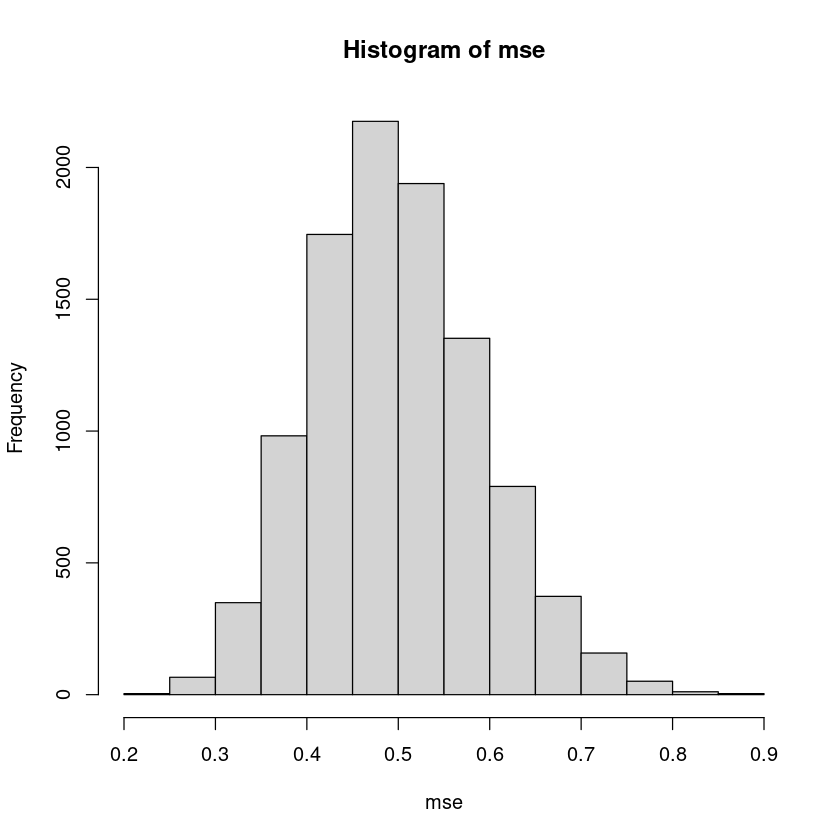

In [15]:
hist(mse)

O histograma se aproxima muito da curva normal, deixando claro que o modelo aplicado foi bem sucedido ao 
realizar as previsões de valores. 